# Car Brand Classification using Deep Learning

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [3]:
# Import the resnet 50 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


94781440/94765736 [==============================] - 283s 3us/step


In [4]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [15]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
2/2 [==============================] - 16s 11s/step - loss: 5.5959 - accuracy: 0.4062 - val_loss: 13.1773 - val_accuracy: 0.3793
Epoch 2/10
2/2 [==============================] - 16s 11s/step - loss: 8.4172 - accuracy: 0.4531 - val_loss: 12.8122 - val_accuracy: 0.3276
Epoch 3/10
2/2 [==============================] - 16s 11s/step - loss: 7.6711 - accuracy: 0.4375 - val_loss: 9.6060 - val_accuracy: 0.1552
Epoch 4/10
2/2 [==============================] - 16s 11s/step - loss: 4.4354 - accuracy: 0.4844 - val_loss: 2.5790 - val_accuracy: 0.3276
Epoch 5/10
2/2 [==============================] - 15s 11s/step - loss: 2.7765 - accuracy: 0.3594 - val_loss: 4.4952 - val_accuracy: 0.5172
Epoch 6/10
2/2 [==============================] - 16s 11s/step - loss: 5.6064 - accuracy: 0.3750 - val_loss: 3.1159 - val_accuracy: 0.5172
Epoch 7/10
2/2 [==============================] - 16s 12s/step - loss: 2.1311 - accuracy: 0.5000 - val_loss: 2.8603 - val_accuracy: 0.3793
Epoch 8/10
2/2 [=========

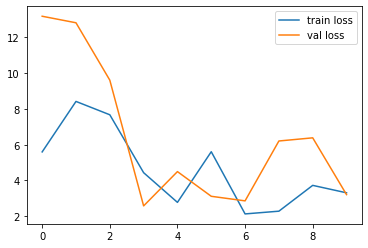

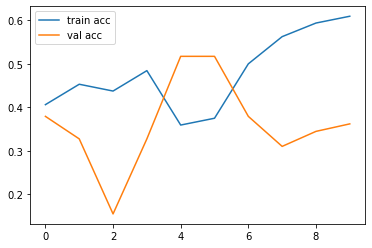

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

C:\Users\RAICHAL\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [20]:
y_pred = model.predict(test_set)

In [21]:
y_pred

array([[1.13300495e-01, 1.39413212e-04, 8.86560023e-01],
       [8.08852196e-01, 1.11862272e-03, 1.90029159e-01],
       [9.65880096e-01, 3.87243017e-05, 3.40811908e-02],
       [1.03400320e-01, 2.97092390e-03, 8.93628836e-01],
       [7.95122683e-01, 2.41422206e-02, 1.80735156e-01],
       [1.22809395e-01, 1.76803007e-06, 8.77188861e-01],
       [4.19463336e-01, 1.18075451e-02, 5.68729103e-01],
       [5.90000972e-02, 1.33723661e-04, 9.40866232e-01],
       [3.49122286e-01, 4.85063978e-02, 6.02371335e-01],
       [8.62737596e-01, 1.98659967e-04, 1.37063682e-01],
       [6.13858327e-02, 2.34240288e-04, 9.38379943e-01],
       [3.54573458e-01, 7.44049344e-03, 6.37986064e-01],
       [8.05644467e-02, 3.99874034e-06, 9.19431508e-01],
       [4.80677821e-02, 9.13553056e-04, 9.51018631e-01],
       [3.17493916e-01, 1.22456404e-04, 6.82383657e-01],
       [8.52529049e-01, 7.98155961e-04, 1.46672726e-01],
       [2.25844909e-03, 7.83325937e-09, 9.97741580e-01],
       [2.59128809e-01, 1.45170

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2], dtype=int64)

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('model_resnet50.h5')

In [27]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [28]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [29]:
x.shape

(224, 224, 3)

In [30]:
x=x/255

In [31]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [32]:
model.predict(img_data)

array([[9.8725334e-03, 9.2249305e-05, 9.9003524e-01]], dtype=float32)

In [33]:
a=np.argmax(model.predict(img_data), axis=1)

In [34]:
a==1

array([False])